# Smart Retail Solutions Limited

<img src="shelf.jpeg" alt="Shelf in a retail store" width="900" height="600">



## Problem statement
A retail company aims to improve customer engagement and increase sales by
implementing a Customer Segmentation & Recommendation System using Machine Learning (ML)
techniques. The company wants to divide its customer base into distinct segments based on their
purchasing behavior and preferences. Additionally, they want to develop a recommendation system that
provides personalized product recommendations to customers within each segment.
## Research Questions
* What are the key factors influencing customer purchasing behavior and preferences? 
* How can customer segmentation techniques (clustering algorithms) effectively divide the 
customer base into distinct segments?
* What are the characteristics and preferences of each customer segment, and how do they 
differ? 
* How can User-based collaborative Filtering and Content based Filtering be integrated to provide more accurate and diverse recommendations to a customer? 
* How can the recommendation system address the cold start problem for new users or items 
with limited interaction history?

## Objectives
* Segment customers into meaningful groups based on their purchasing behavior, and other
relevant factors.
* Develop a recommendation system that suggests products tailored to the preferences and
interests of each customer segment.
* Enhance customer experience and increase sales by providing targeted and personalized
recommendations.
* Evaluate the performance of the segmentation and recommendation system through metrics
such as customer engagement, conversion rates, and revenue growth.

By addressing this business problem, the retail company can leverage machine learning technology to
segment its customer base, deliver personalized recommendations, and drive business growth through
enhanced customer engagement and sales.

### Data source

In [11]:
# Importing the important libraries

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline




In [12]:
# Loading the dataset
data = pd.read_csv('data.csv', encoding='latin1')

# Display the first few rows of the DataFrame
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

## Exploratory Data Analysis


In [13]:
#Checking the data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200594 entries, 0 to 200593
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    200594 non-null  object 
 1   StockCode    200594 non-null  object 
 2   Description  199802 non-null  object 
 3   Quantity     200594 non-null  int64  
 4   InvoiceDate  200594 non-null  object 
 5   UnitPrice    200593 non-null  float64
 6   CustomerID   142574 non-null  float64
 7   Country      200593 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.2+ MB


In [14]:
# A preview of the first 5 columns
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [15]:
#Checking shape of the dataset: 
data.shape

(200594, 8)

In [16]:
#A summary of the dataset
data.describe()

Quantity      UnitPrice     CustomerID
count  200594.00000  200593.000000  142574.000000
mean        9.27288       5.048201   15273.239854
std       240.14421      96.294694    1725.544263
min    -74215.00000       0.000000   12346.000000
25%         1.00000       1.250000   13815.000000
50%         3.00000       2.100000   15143.000000
75%        10.00000       4.210000   16806.000000
max     74215.00000   16888.020000   18287.000000

In [17]:
#Checking for missing values
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description      792
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     58020
Country            1
dtype: int64

In [18]:
#Number of unique customer id's 
data["CustomerID"].nunique()

2712

In [19]:
#Finding the number of invoices that are cancelled. 

# Filter rows where 'InvoiceNo' column starts with 'C'
cancelled_invoices = data[data["InvoiceNo"].str.startswith("C")]

# Count the number of rows in the filtered DataFrame
count_cancelled_invoices = cancelled_invoices.shape[0]

print("Number of cancelled invoices:", count_cancelled_invoices)


Number of cancelled invoices: 3594


### Inferences
* Missing data in collumns Description and CustomerID

* Negative data in collumns Quantity and Unit price

* Precense of outliers in quantity and unit price 

* Presense of 10147 duplicate entries

* Presence of invoices that have been cancelled

* Column data types are not correctly formatted


In [20]:
#dropping the cancelled invoices
# Filter rows where 'InvoiceNo' column does not start with 'C' (i.e., keep non-cancelled invoices)
non_cancelled_invoices = data[~data["InvoiceNo"].str.startswith("C")]

# Print the shape of the DataFrame before dropping cancelled invoices
print("Shape of DataFrame before dropping cancelled invoices:", data.shape)

# Drop cancelled invoices from the original DataFrame
data = non_cancelled_invoices

# Print the shape of the DataFrame after dropping cancelled invoices
print("Shape of DataFrame after dropping cancelled invoices:", data.shape)


Shape of DataFrame before dropping cancelled invoices: (200594, 8)
Shape of DataFrame after dropping cancelled invoices: (197000, 8)


In [21]:
#dropping the missing values from customer id and description column
data = data.dropna(subset = ["CustomerID", "Description"])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139170 entries, 0 to 200592
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    139170 non-null  object 
 1   StockCode    139170 non-null  object 
 2   Description  139170 non-null  object 
 3   Quantity     139170 non-null  int64  
 4   InvoiceDate  139170 non-null  object 
 5   UnitPrice    139170 non-null  float64
 6   CustomerID   139170 non-null  float64
 7   Country      139170 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 9.6+ MB


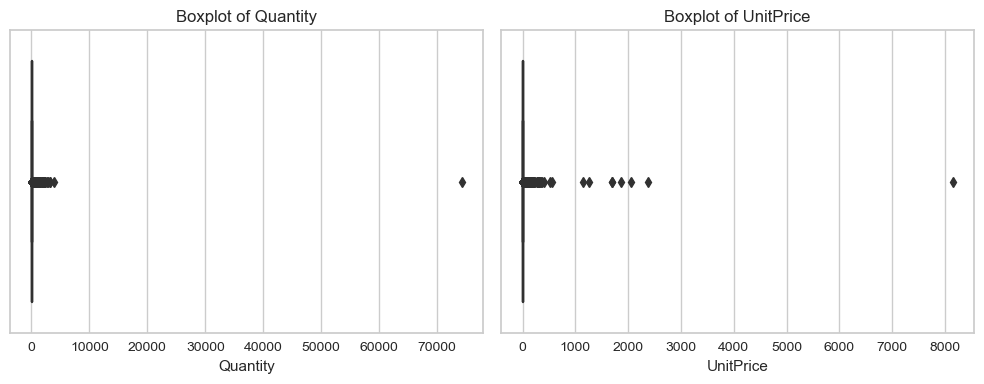

In [23]:
#Cheking for outliers
# Set the size of the overall figure
plt.figure(figsize=(10, 4))

# Create subplots for Quantity and UnitPrice
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Quantity'])
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.xlabel('UnitPrice')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



Outliers will not be removed in this stage as they are essential to the feature engineering stage. 

In [24]:
#Changing to suitable data types

# Convert 'InvoiceNo' to numeric
data.loc[:, 'InvoiceNo'] = pd.to_numeric(data['InvoiceNo'], errors='coerce')

# Convert 'Description' to string
data.loc[:, 'Description'] = data['Description'].astype(str)

# Convert 'Quantity' to numeric
data.loc[:, 'Quantity'] = pd.to_numeric(data['Quantity'])

# Convert 'InvoiceDate' to datetime
data.loc[:, 'InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Convert 'UnitPrice' to float
data.loc[:, 'UnitPrice'] = data['UnitPrice'].astype(float)

# Convert 'CustomerID' to numeric
data.loc[:, 'CustomerID'] = pd.to_numeric(data['CustomerID'])

# Convert 'Country' to string (object)
data.loc[:, 'Country'] = data['Country'].astype(str)


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139170 entries, 0 to 200592
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    139170 non-null  object 
 1   StockCode    139170 non-null  object 
 2   Description  139170 non-null  object 
 3   Quantity     139170 non-null  int64  
 4   InvoiceDate  139170 non-null  object 
 5   UnitPrice    139170 non-null  float64
 6   CustomerID   139170 non-null  float64
 7   Country      139170 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 9.6+ MB


In [26]:
# Check for negative values in 'Quantity'
negative_quantity = data[data['Quantity'] < 0]

# Check for values less than 1 in 'UnitPrice'
negative_unit_price = data[data['UnitPrice'] < 1]

# Check for values equal to 0 in 'UnitPrice'
zero_unit_price = data[data['UnitPrice'] == 0]

# Print the number of rows with negative values in each column
print("Number of rows with negative values in 'Quantity':", len(negative_quantity))
print("Number of rows with values less than 1 in 'UnitPrice':", len(negative_unit_price))
print("Number of rows with values equal to 0 in 'UnitPrice':", len(zero_unit_price))



Number of rows with negative values in 'Quantity': 0
Number of rows with values less than 1 in 'UnitPrice': 29716
Number of rows with values equal to 0 in 'UnitPrice': 13


In [27]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

Unit price can be in decimals as well e.g 0.85 pounds

# Feature engineering
## 1.RFM Features
## a. Recency: Calculating how recently the customer has engaged with the system

In [28]:
import pandas as pd

# Convert InvoiceDate to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract only the date from InvoiceDate
data['InvoiceDay'] = data['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = data.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = data['InvoiceDay'].max()

# Convert most recent date to datetime type
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - pd.to_datetime(customer_data['InvoiceDay'])).dt.days

# Drop the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [29]:
customer_data.head()

CustomerID  Days_Since_Last_Purchase
0     12346.0                       125
1     12347.0                        46
2     12348.0                        48
3     12350.0                       110
4     12352.0                        62

## b. Frequency: Create two features about the frequency of products bought and the number of times a customer interacted with the system.

In [30]:
# Calculate the total number of transactions made by each customer
total_transactions = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = data.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       125                   1   
1     12347.0                        46                   3   
2     12348.0                        48                   3   
3     12350.0                       110                   1   
4     12352.0                        62                   5   

   Total_Products_Purchased  
0                     74215  
1                      1117  
2                      2124  
3                       197  
4                       254

## c. Monetary: Create features about how a customer spends their money

In [31]:
# Calculate the total spend by each customer
data['Total_Spend'] = data['UnitPrice'] * data['Quantity']
total_spend = data.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       125                   1   
1     12347.0                        46                   3   
2     12348.0                        48                   3   
3     12350.0                       110                   1   
4     12352.0                        62                   5   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  
0                     74215     77183.60               77183.600000  
1                      1117      1823.43                 607.810000  
2                      2124      1487.24                 495.746667  
3                       197       334.40                 334.400000  
4                       254      1561.81                 312.362000

# 2.Product Diversity
 Create a feature about the number of distinct products a customer buys.

In [32]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = data.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       125                   1   
1     12347.0                        46                   3   
2     12348.0                        48                   3   
3     12350.0                       110                   1   
4     12352.0                        62                   5   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                     74215     77183.60               77183.600000   
1                      1117      1823.43                 607.810000   
2                      2124      1487.24                 495.746667   
3                       197       334.40                 334.400000   
4                       254      1561.81                 312.362000   

   Unique_Products_Purchased  
0                          1  
1                         63  
2                         22  
3                         17  
4                         26

## 3.Behavioral Features
Create features that gives us the customer preferences in regards to when they like to shop(Average day between purchases, favorite shopping day and hour)

In [33]:
# Extract day of week and hour from InvoiceDate
data['Day_Of_Week'] = data['InvoiceDate'].dt.dayofweek
data['Hour'] = data['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = data.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = data.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = data.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12347.0                        46                   3   
1     12348.0                        48                   3   
2     12350.0                       110                   1   
3     12352.0                        62                   5   
4     12353.0                         4                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      1117      1823.43                 607.810000   
1                      2124      1487.24                 495.746667   
2                       197       334.40                 334.400000   
3                       254      1561.81                 312.362000   
4                        20        89.00                  89.000000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                         63                        1.457831            1   
1                         22                        4.074074            3   
2                         17                        0.000000            2   
3                         26                        0.918919            1   
4                          4                        0.000000            3   

   Hour  
0    14  
1    19  
2    16  
3    12  
4    17

## 4.Geographic features
Understanding the location of the customers.

In [34]:
data['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.893030
Germany           0.023001
France            0.020608
EIRE              0.015715
Spain             0.006510
Name: proportion, dtype: float64

In [35]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = data.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12347.0                        46                   3   
1     12348.0                        48                   3   
2     12350.0                       110                   1   
3     12352.0                        62                   5   
4     12353.0                         4                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      1117      1823.43                 607.810000   
1                      2124      1487.24                 495.746667   
2                       197       334.40                 334.400000   
3                       254      1561.81                 312.362000   
4                        20        89.00                  89.000000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                         63                        1.457831            1   
1                         22                        4.074074            3   
2                         17                        0.000000            2   
3                         26                        0.918919            1   
4                          4                        0.000000            3   

   Hour  Is_UK  
0    14      0  
1    19      0  
2    16      0  
3    12      0  
4    17      0

In [36]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

Is_UK
1    2349
0     245
Name: count, dtype: int64

## 5.Seasonality and Trends 
Understanding patterns from customers.

In [37]:
# Extract month and year from InvoiceDate
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = data.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12347.0                        46                   3   
1     12348.0                        48                   3   
2     12350.0                       110                   1   
3     12352.0                        62                   5   
4     12353.0                         4                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      1117      1823.43                 607.810000   
1                      2124      1487.24                 495.746667   
2                       197       334.40                 334.400000   
3                       254      1561.81                 312.362000   
4                        20        89.00                  89.000000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                         63                        1.457831            1   
1                         22                        4.074074            3   
2                         17                        0.000000            2   
3                         26                        0.918919            1   
4                          4                        0.000000            3   

   Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0    14      0             607.810000            120.738831          -37.77  
1    19      0             495.746667            350.867155         -262.90  
2    16      0             334.400000              0.000000            0.00  
3    12      0             780.905000            685.052121          968.81  
4    17      0              89.000000              0.000000            0.00

In [38]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [39]:
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12347.0                        46                   3   
1    12348.0                        48                   3   
2    12350.0                       110                   1   
3    12352.0                        62                   5   
4    12353.0                         4                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      1117      1823.43                     607.81   
1                      2124      1487.24                 495.746667   
2                       197        334.4                      334.4   
3                       254      1561.81                    312.362   
4                        20         89.0                       89.0   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                         63                        1.457831            1   
1                         22                        4.074074            3   
2                         17                             0.0            2   
3                         26                        0.918919            1   
4                          4                             0.0            3   

   Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0    14      0                 607.81            120.738831          -37.77  
1    19      0             495.746667            350.867155          -262.9  
2    16      0                  334.4                   0.0             0.0  
3    12      0                780.905            685.052121          968.81  
4    17      0                   89.0                   0.0             0.0

# Handling Outliers

In [40]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12347.0                        46                   3   
1    12348.0                        48                   3   
2    12350.0                       110                   1   
3    12352.0                        62                   5   
4    12353.0                         4                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      1117      1823.43                     607.81   
1                      2124      1487.24                 495.746667   
2                       197        334.4                      334.4   
3                       254      1561.81                    312.362   
4                        20         89.0                       89.0   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                         63                        1.457831            1   
1                         22                        4.074074            3   
2                         17                             0.0            2   
3                         26                        0.918919            1   
4                          4                             0.0            3   

   Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0    14      0                 607.81            120.738831          -37.77   
1    19      0             495.746667            350.867155          -262.9   
2    16      0                  334.4                   0.0             0.0   
3    12      0                780.905            685.052121          968.81   
4    17      0                   89.0                   0.0             0.0   

   Outlier_Scores  Is_Outlier  
0               1           0  
1              -1           1  
2               1           0  
3              -1           1  
4               1           0

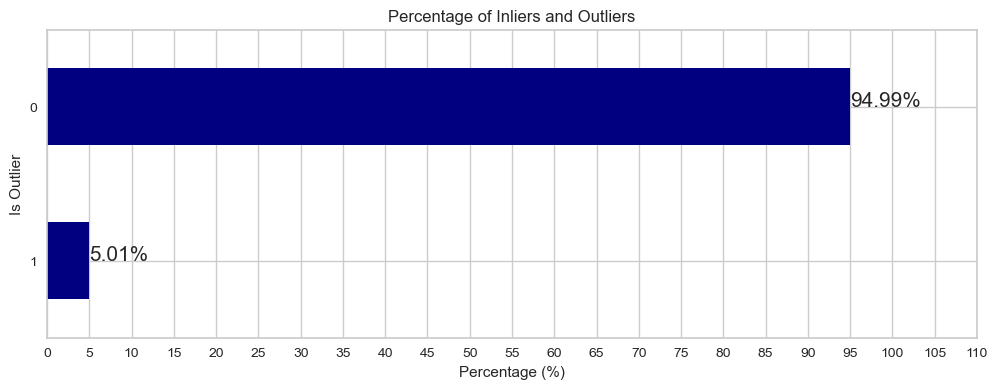

In [41]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#000080')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [42]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [43]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]


2464

# Correlation Analysis

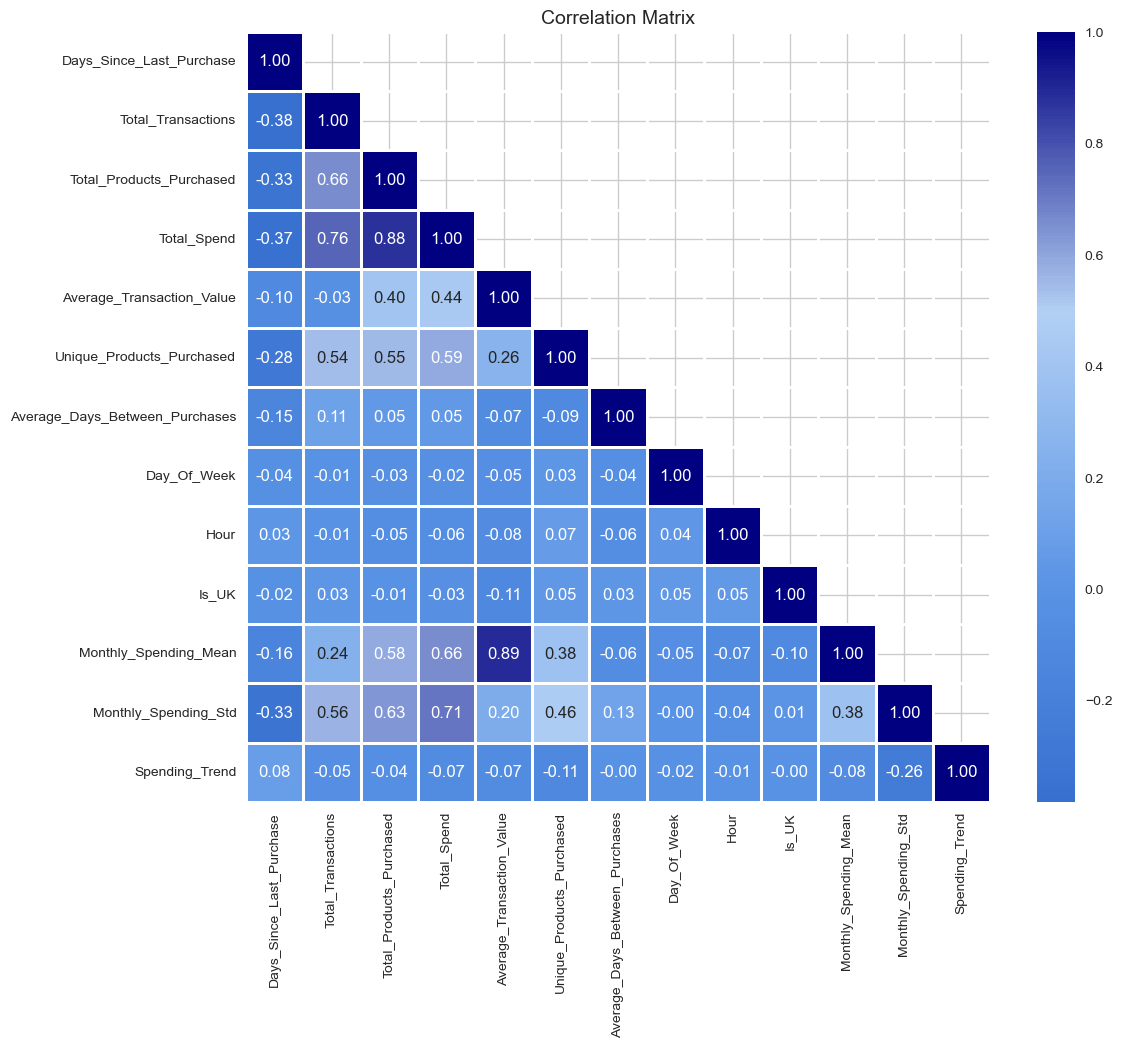

In [44]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#0047AB', '#2D65C9', '#5993E5', '#B3D0F4', '#000080']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

# Feature Scaling

In [45]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()


CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12347.0                 -0.276382            0.281249   
1    12350.0                  0.996564           -0.573249   
2    12353.0                 -1.111753           -0.573249   
3    12354.0                 -0.554839           -0.573249   
4    12355.0                 -0.912855           -0.573249   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                  1.298547     1.234589                   1.209261   
1                 -0.422257    -0.483705                   0.023285   
2                 -0.753324    -0.766889                  -1.041192   
3                  0.200599     0.376002                   3.254886   
4                 -0.341828    -0.339459                   0.565500   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                   0.633014                        0.024140            1   
1                  -0.546728                       -0.315091            2   
2                  -0.880133                       -0.315091            3   
3                   0.504781                       -0.315091            3   
4                  -0.649314                       -0.315091            0   

       Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  \
0  0.654803      0               0.849595              0.353458   
1  1.506895      0              -0.161049             -0.538033   
2  1.932940      0              -1.068155             -0.538033   
3  0.228758      0               2.592799             -0.538033   
4  0.228758      0               0.301006             -0.538033   

   Spending_Trend  
0       -0.146979  
1        0.111899  
2        0.111899  
3        0.111899  
4        0.111899

# Dimensionality Reduction(PCA)
To address the high multicolinearity between certain features

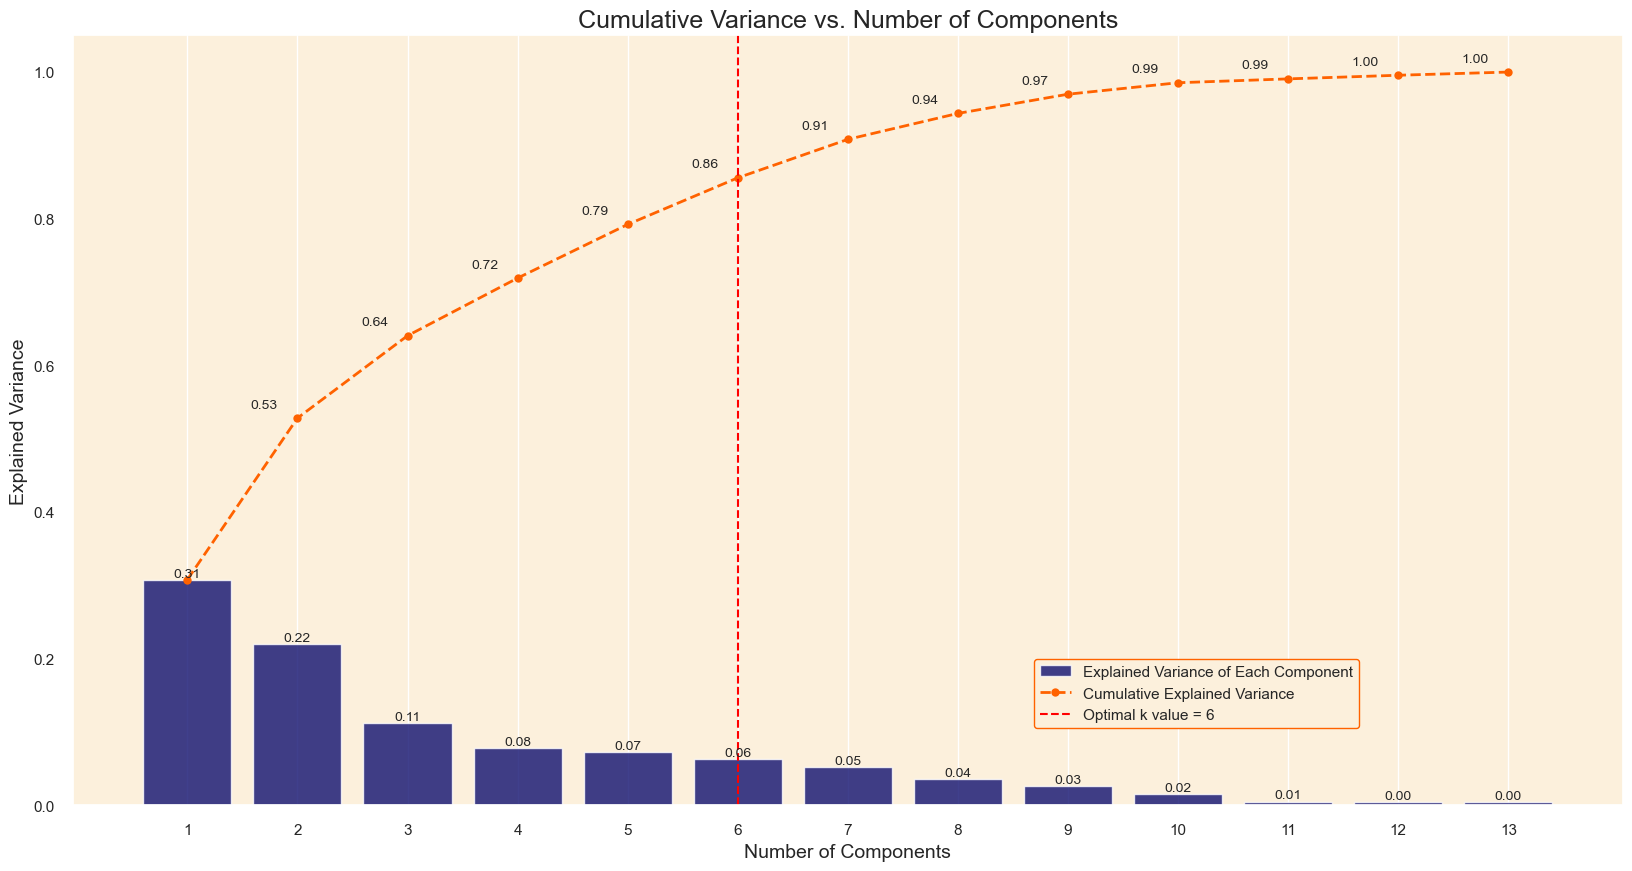

In [46]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#000080',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [47]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index


In [48]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
CustomerID                                                            
12347.0     2.298415 -1.423074 -0.659216 -0.462677 -0.013940  0.669129
12350.0    -1.280465 -0.596940 -0.584237 -1.190621  0.058204  0.885100
12353.0    -1.854811  0.536312  1.017694 -1.175105  0.173957  1.249911
12354.0     1.839587  0.369869 -3.547870  0.327105 -0.031395  1.189698
12355.0    -0.341262 -2.557142 -0.594082  0.032815  0.074055  0.474701

 Extracting the coefficients corresponding to each principal component to better understand the transformation performed by PCA

In [49]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #000080' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

## K-Means Clustering


KMeans algorithm, I will set the init parameter to k-means++ and n_init to 10. To determine the optimal number of clusters, I will employ the elbow method and silhouette analysis. Additionally, it might be beneficial to explore the use of alternative clustering algorithms such as GMM and DBSCAN in future analyses to potentially enhance the segmentation results.

## Determining the Optimal Number of Clusters

### Elbow Method

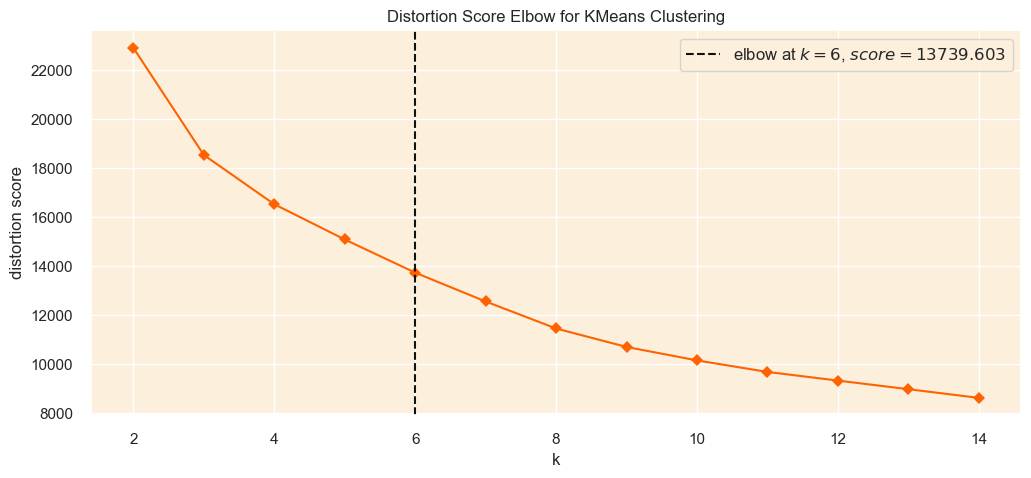

In [50]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

## Optimal k Value:
 Elbow Method Insights
The optimal value of k for the KMeans clustering algorithm can be found at the elbow point. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is between 3 and 6.




# Silhouetee Method

In [51]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()


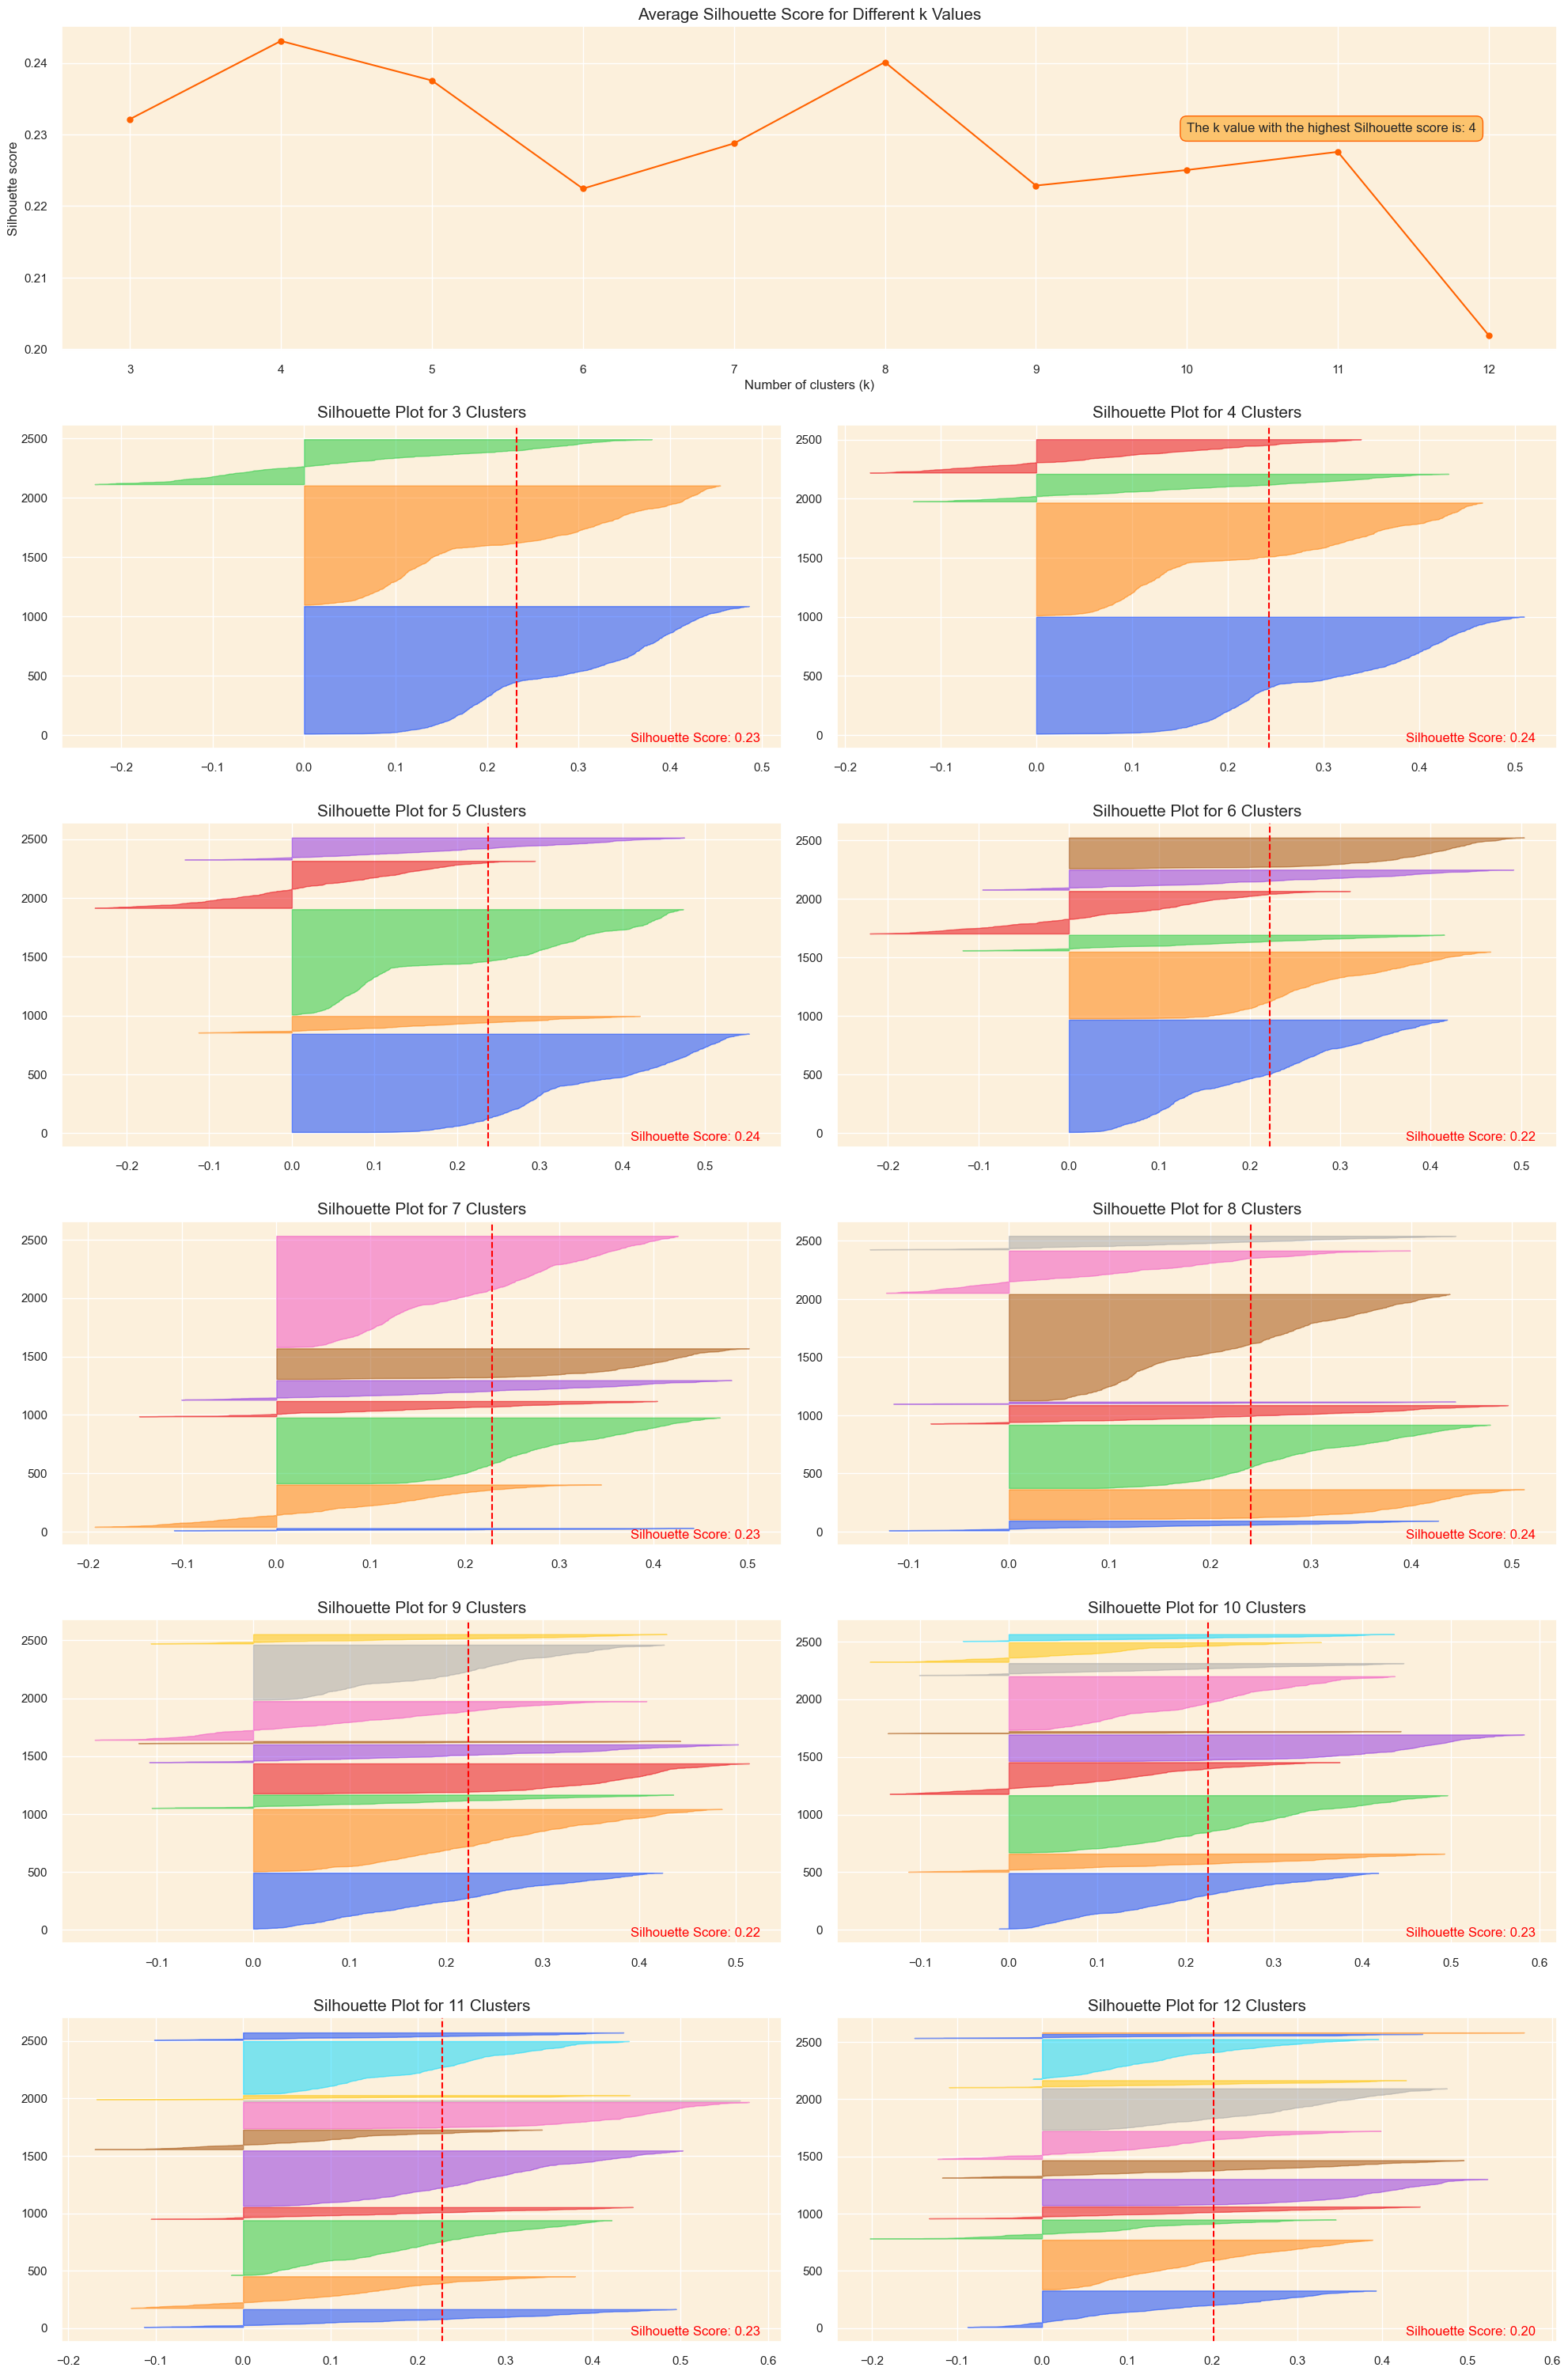

In [52]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

## choosing ( k = 3 ) is the better option.

## Clustering Model - K-means

In [53]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [54]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12347.0                        46                   3   
1    12350.0                       110                   1   
2    12353.0                         4                   1   
3    12354.0                        32                   1   
4    12355.0                        14                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                      1117      1823.43                     607.81   
1                       197        334.4                      334.4   
2                        20         89.0                       89.0   
3                       530       1079.4                     1079.4   
4                       240        459.4                      459.4   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                         63                        1.457831            1   
1                         17                             0.0            2   
2                          4                             0.0            3   
3                         58                             0.0            3   
4                         13                             0.0            0   

   Hour  Is_UK  Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0    14      0                 607.81            120.738831          -37.77   
1    16      0                  334.4                   0.0             0.0   
2    17      0                   89.0                   0.0             0.0   
3    13      0                 1079.4                   0.0             0.0   
4    13      0                  459.4                   0.0             0.0   

   cluster  
0        0  
1        1  
2        2  
3        0  
4        1

## Clustering Evaluation

## a. 3D Visualization of Top Principal Components

In [55]:
# Setting up the color scheme for the clusters (RGB order 
colors = ['#2980b9', '#27ae60', '#8e44ad']

In [56]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()



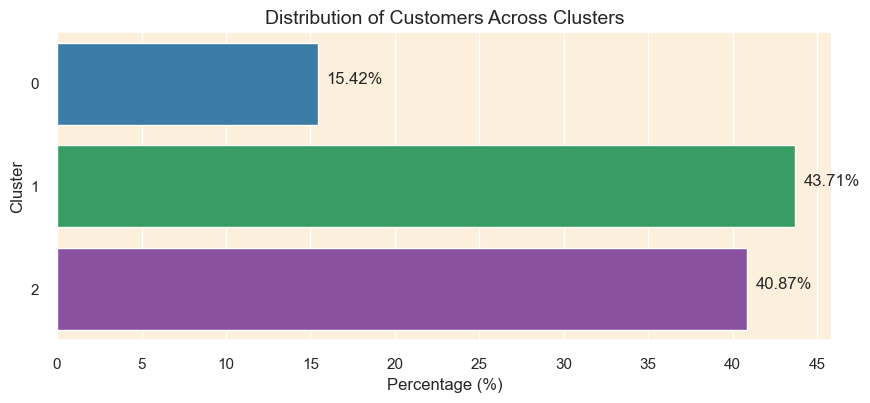

In [57]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

## Evaluation Metrics


In [58]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        2464        |
|    Silhouette Score     | 0.2321598310499124 |
| Calinski Harabasz Score | 753.9449993487048  |
|  Davies Bouldin Score   | 1.3823488573760603 |
+-------------------------+--------------------+


## Clustering Quality Inference
The Silhouette Score of approximately 0.2321, indicates a fair amount of separation between the clusters. 

The Calinski Harabasz Score is 753, which is considerably high, indicating that the clusters are well-defined. 

The Davies Bouldin Score of 1.38 is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. 




## Cluster Analysis and Profiling

### Using a Radar Chart Approach


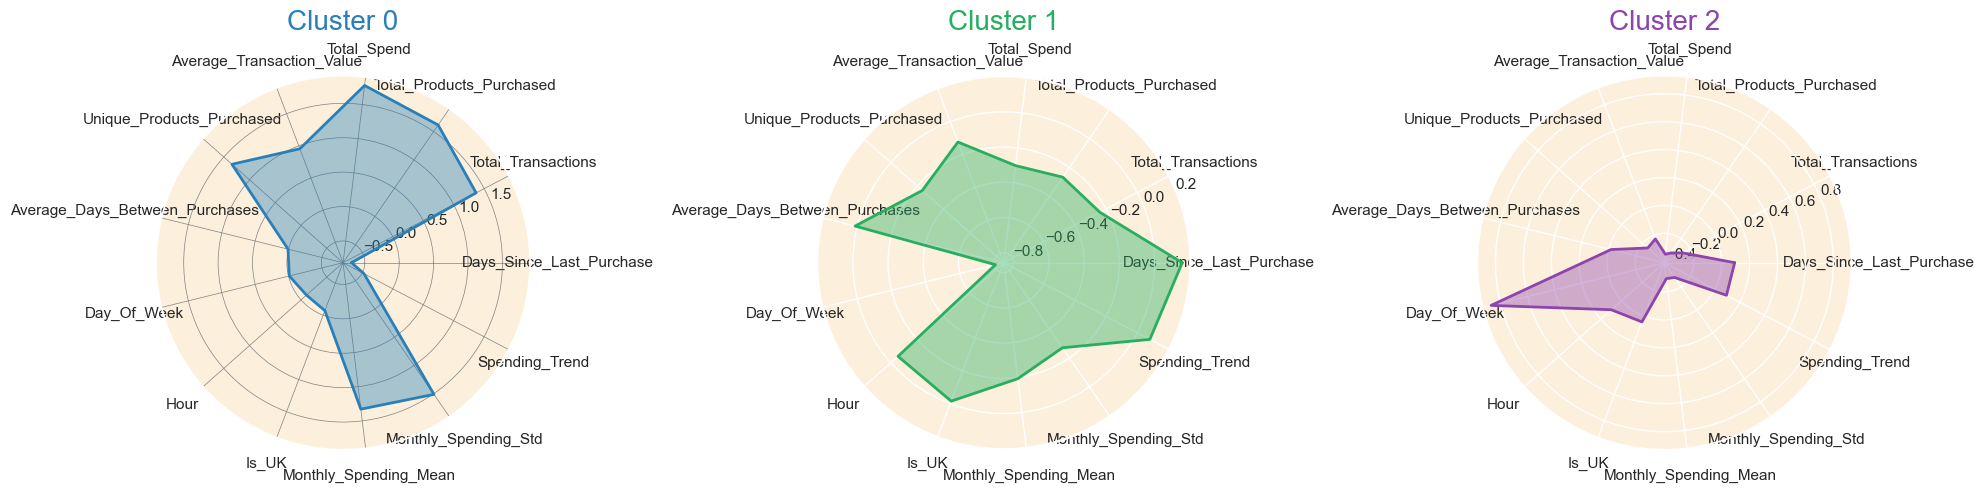

In [59]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

## RECOMMENDATION SYSTEM

## User based Collaborative Filtering- This is based on Frequently bought products per customer category

In [60]:
df = pd.read_csv('data.csv', encoding='latin1')


In [61]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Group products by cluster
cluster_groups = merged_data.groupby('cluster')

# Generate recommendations for each cluster
recommendations = {}
for cluster_id, cluster_data in cluster_groups:
    top_products = cluster_data['Description'].value_counts().head(10).index.tolist()
    recommendations[cluster_id] = top_products

# Print recommendations for each cluster
for cluster_id, products in recommendations.items():
    print(f"Cluster {cluster_id} Recommendations:")
    for rank, product in enumerate(products, start=1):
        print(f"{rank}. {product}")
    

Cluster 0 Recommendations:
1. REGENCY CAKESTAND 3 TIER
2. WHITE HANGING HEART T-LIGHT HOLDER
3. JUMBO BAG RED RETROSPOT
4. PARTY BUNTING
5. ASSORTED COLOUR BIRD ORNAMENT
6. LUNCH BAG RED RETROSPOT
7. SET OF 6 SPICE TINS PANTRY DESIGN
8. SET OF 3 CAKE TINS PANTRY DESIGN 
9. PACK OF 72 RETROSPOT CAKE CASES
10. JAM MAKING SET WITH JARS
Cluster 1 Recommendations:
1. WHITE HANGING HEART T-LIGHT HOLDER
2. REGENCY CAKESTAND 3 TIER
3. PARTY BUNTING
4. ASSORTED COLOUR BIRD ORNAMENT
5. JAM MAKING SET WITH JARS
6. NATURAL SLATE HEART CHALKBOARD 
7. JUMBO BAG RED RETROSPOT
8. SET OF 3 CAKE TINS PANTRY DESIGN 
9. PACK OF 72 RETROSPOT CAKE CASES
10. REX CASH+CARRY JUMBO SHOPPER
Cluster 2 Recommendations:
1. WHITE HANGING HEART T-LIGHT HOLDER
2. REGENCY CAKESTAND 3 TIER
3. ASSORTED COLOUR BIRD ORNAMENT
4. PARTY BUNTING
5. SET OF 3 CAKE TINS PANTRY DESIGN 
6. NATURAL SLATE HEART CHALKBOARD 
7. REX CASH+CARRY JUMBO SHOPPER
8. JAM MAKING SET WITH JARS
9. PACK OF 72 RETROSPOT CAKE CASES
10. SET OF 6 SPIC

## Addressing Cold Start

In [69]:
# Filter data for customers from the United Kingdom
uk_data = merged_data[merged_data['Country'] == "United Kingdom" ]

# Get top products for UK data
top_products_uk = uk_data['Description'].value_counts().head(10).index.tolist()

# Print recommendations for UK data
print("Top Products Recommendations for Customers from the UK:")
for rank, product in enumerate(top_products_uk, start=1):
    print(f"{rank}. {product}")

Top Products Recommendations for Customers from the UK:
1. WHITE HANGING HEART T-LIGHT HOLDER
2. REGENCY CAKESTAND 3 TIER
3. PARTY BUNTING
4. ASSORTED COLOUR BIRD ORNAMENT
5. SET OF 3 CAKE TINS PANTRY DESIGN 
6. JUMBO BAG RED RETROSPOT
7. NATURAL SLATE HEART CHALKBOARD 
8. JAM MAKING SET WITH JARS
9. SET OF 6 SPICE TINS PANTRY DESIGN
10. PACK OF 72 RETROSPOT CAKE CASES


In [70]:
# Filter data for customers from the United Kingdom
uk_data = merged_data[merged_data['Country'] != "United Kingdom" ]

# Get top products for UK data
top_products_uk = uk_data['Description'].value_counts().head(10).index.tolist()

# Print recommendations for UK data
print("Top Products Recommendations for Customers from the UK:")
for rank, product in enumerate(top_products_uk, start=1):
    print(f"{rank}. {product}")

Top Products Recommendations for Customers from the UK:
1. POSTAGE
2. ROUND SNACK BOXES SET OF4 WOODLAND 
3. PLASTERS IN TIN CIRCUS PARADE 
4. ROUND SNACK BOXES SET OF 4 FRUITS 
5. REGENCY CAKESTAND 3 TIER
6. SPACEBOY LUNCH BOX 
7. PLASTERS IN TIN SPACEBOY
8. RED TOADSTOOL LED NIGHT LIGHT
9. PLASTERS IN TIN WOODLAND ANIMALS
10. LUNCH BAG WOODLAND


## Content based Filtering- Recomendations based on items a user buys

In [66]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Create user-item matrix
user_item_matrix = merged_data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Map user IDs to integer positions
user_id_to_index = {user_id: index for index, user_id in enumerate(user_item_matrix.index)}
index_to_user_id = {index: user_id for user_id, index in user_id_to_index.items()}

# Check if user ID exists in the dataset
def user_exists(user_id):
    return user_id in user_id_to_index

# Function to generate recommendations for a given user
def generate_recommendations(user_id, top_n=5):
    if not user_exists(user_id):
        return []
    user_index = user_id_to_index[user_id]
    similar_users = sorted(list(enumerate(user_similarity[user_index])), key=lambda x: x[1], reverse=True)
    recommendations = []
    for user_index, similarity in similar_users:
        if user_index != user_id:
            similar_user_items = user_item_matrix.iloc[user_index]
            recommendations.extend(similar_user_items[similar_user_items > 0].index)
        if len(recommendations) >= top_n:
            break
    return recommendations[:top_n]

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)



In [67]:
# Example: Generate recommendations for user with ID 13047.0
user_id = 12713.0
recommendations = generate_recommendations(user_id)
print(f"Recommendations for user {user_id}: {recommendations}")

Recommendations for user 12713.0: []


In [68]:
# Function to get descriptions of recommended stock codes
def get_descriptions(recommended_stock_codes):
    descriptions = []
    for stock_code in recommended_stock_codes:
        description = merged_data[merged_data['StockCode'] == stock_code]['Description'].iloc[0]
        descriptions.append(description)
    return descriptions


# Example: Get descriptions of recommended stock codes
recommended_stock_codes = ['21122', '21497']  # Replace with actual recommended stock codes
descriptions = get_descriptions(recommended_stock_codes)
print("Descriptions of recommended stock codes:")
for description in descriptions:
    print(description)

Descriptions of recommended stock codes:
SET/10 PINK POLKADOT PARTY CANDLES
FANCY FONTS BIRTHDAY WRAP


## Conclusion

1. Effective Segmentation: The use of K-means clustering along with dimensionality reduction techniques like PCA proved effective in segmenting customers based on their purchasing behavior and preferences. The clustering identified a total of three segments.
2. Feature Engineering : The use of RFM(Recency, Frequency and Monentary) allowed us to establish customer behaviour and preferences. 
3. Recommendation System: The developed recommendation system, based on frequently bought products within each cluster and other related items to what the ustomer bought, provides personalized recommendations tailored to the preferences of individual customer segments.
4. Cold Start: The Model used demographic information for initial recomendations for users who have not yet interacted with the system.

## Recomendations

1. Evaluation Metrics: Continuously monitor and evaluate the performance of the segmentation and recommendation system using relevant metrics such as customer engagement, conversion rates, and revenue growth.
2. Cold Start Problem: Address the cold start problem for new users or items with limited interaction history by asking for more personalised information about the users as they register on the system.
3. Feedback Mechanism: Implement a feedback mechanism to collect data on the effectiveness of recommendations and their purchases and use this feedback to continuously improve the recommendation system's performance.